# Baseball Projesi

#### Problem & Amaç
Projedeki amacımız beyzbol oyuncularının maaş tahminini yapmak.



#### Verisetindeki değişkenler

* AtBat : 1986 yılında vuruş sayısı

* Hits : 1986'daki isabet sayısı

* HmRun : 1986 yılında yapılan home run sayısı

* Runs : 1986 yılında yapılan koşu sayısı

* RBI : 1986 yılında vuruş yapılan koşu sayısı (RBI = Bir vurucunun vuruş yaptığında kaç tane oyuncuya run yaptırdığı)  #rbi, run dan daha önemli

* Walks : 1986 yılında yürüyüş sayısı

* Years : Büyük liglerdeki yıl sayısı

* CAtBat : Kariyeri boyunca vuruş sayısı

* CHits : Kariyeri boyunca isabet sayısı

* CHmRun : Kariyeri boyunca home run sayısı

* CRuns : Kariyeri boyunca koşu sayısı

* CRBI : Kariyeri boyunca vuruş yapılan koşu sayısı

* CWalks : Kariyeri boyunca yürüyüş sayısı

* League : Oyuncunun ligini gösteren "A" ve "N"  seviyelerine sahip bir faktör

* Division : 1986 sonunda oyuncunun bölünmesini gösteren "E" ve "W" seviyelerine sahip bir faktör

* PutOuts : 1986 yılında yapılan itiraz sayısı

* Assists : 1986 yılında asist sayısı

* Errors : 1986'daki hata sayısı (topu yanlış yere atma, topu elinden kaçırma..)

* Salary : 1987 açılış gününde yıllık binlerce dolar maaş

* NewLeague :  1987'nin başında seviyeleri A ve N oyuncunun ligini gösteren bir faktör

#hangi değişkenlerin MLB oyuncularının maaşlarını tahmin etme olasılığının yüksek olduğunu tahmin edin.

# Table Of Contents :

### 1.Kütüphaneleri Import Etme - Veriyi Okuma


### 2.Veri Ön İşleme 
    
    2.1 Genel Bilgiler 
    
    2.2 Eksik Veri 
    
    2.3 Eksik Verileri Doldurma 
    
    2.4 Aykırı Gözlem
    
    2.5 Dağılım Grafikleri
    
    
### 3.Özellik Mühendisliği
    
    3.1 Yeni Değişken Oluşturma
    
    3.2 Kategorik Değişkenlerde Ölçeklendirme
    
    3.3 Sürekli Değişkenlerde Ölçeklendirme
    
    3.4 Değişken Önem Düzeyleri
    
  
### 4.Model 
    
    4.1 Lineer Regression
    
    4.2 Ridge Regression
    
    4.3 Lasso Regression
    
    4.4 ElasticNet Regression

### 5. Model Selecting


# 1. Kütüphaneleri Import Etme - Veriyi Okuma

In [3]:
import warnings
warnings.simplefilter(action='ignore')

* Import işlemleri

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

* Datayı okuma

In [5]:
hitters_data = pd.read_csv("Hitters.csv")
df = hitters_data.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
df.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.0,A


# 2. Veri Ön İşleme

## 2.1 Genel Bilgiler

* Yapısal bilgiler

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

* Boyut sayısı

In [8]:
df.shape

(322, 20)

* Sütunlarına erişme

In [9]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

* Betimsel istatistik

In [10]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


* Kategorik ve Sürekli Değişkenler

In [11]:
cat_features = ['League','Division','NewLeague'] 
num_features = list(df.select_dtypes(['int64']).columns)
num_features

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

## 2.2 Eksik Veriler

In [12]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

AtBat        322
Hits         322
HmRun        322
Runs         322
RBI          322
Walks        322
Years        322
CAtBat       322
CHits        322
CHmRun       322
CRuns        322
CRBI         322
CWalks       322
League       322
Division     322
PutOuts      322
Assists      322
Errors       322
Salary       263
NewLeague    322
dtype: int64

In [13]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [14]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,N,W,1378,102,8,NaN,N
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,A,E,70,149,12,NaN,A
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,NaN,A
39,241,61,1,34,12,14,1,241,61,1,34,12,14,N,W,166,172,10,NaN,N
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,N,W,103,84,5,NaN,N


In [15]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## Eksik Veri Yapısının Görselleştirilmesi

In [16]:
!pip install missingno

In [17]:
#Eksik gözlemlerin görselleştirilmesi için missingno kütüphanesi import edilmiştir.
import missingno as msno

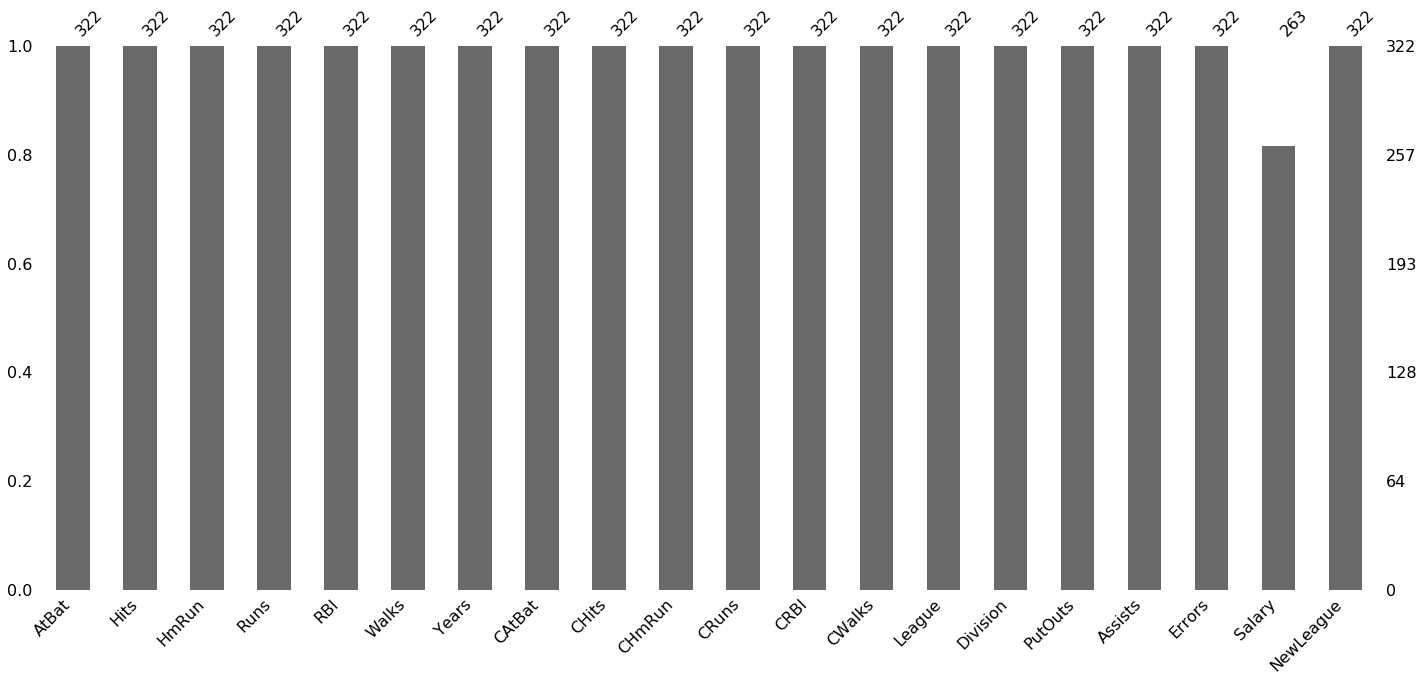

In [18]:
#Eksik gözlemler görselleştirilmiştir.
msno.bar(df);

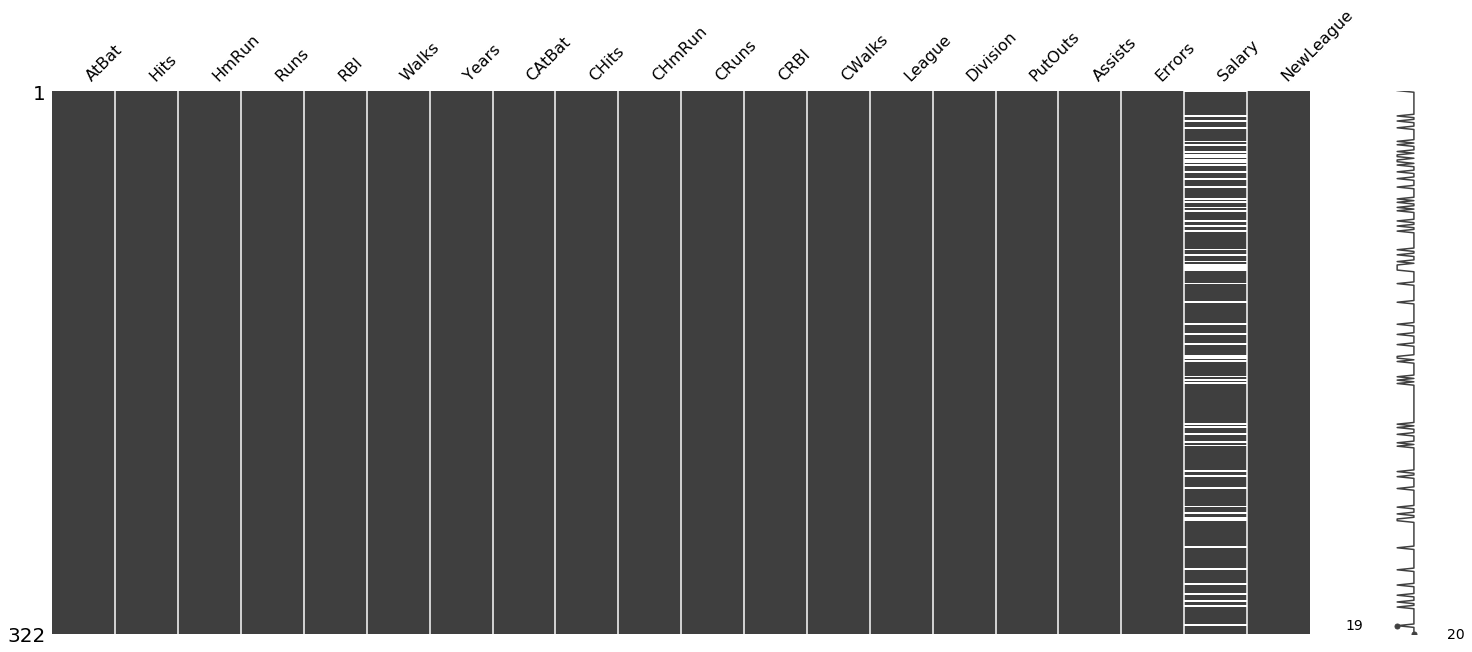

In [19]:
#Eksik gözlemler görselleştirilmiştir.
msno.matrix(df);

## 2.3 Eksik Verileri Doldurma 

League ve Division a bağlı olarak Salary İncelemesi

In [20]:
df["Years"].min()

1

In [21]:
df["Years"].max()

24

In [22]:
YearsGroup = pd.cut(df.Years,bins=[0,5,10,15,25],labels=['1', '2', '3' ,'4'])
df["YearsGroup"]=YearsGroup
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,YearsGroup
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,NaN,A,1
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,3
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,1
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,3
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,N,E,325,9,3,700.0,N,1
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,A,E,313,381,20,875.0,A,3
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,A,W,37,113,7,385.0,A,2
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,A,E,1314,131,12,960.0,A,2


In [23]:
df.groupby(["League","Division", "YearsGroup"])["Salary"].mean()

League  Division  YearsGroup
A       E         1             427.159091
                  2             787.252400
                  3             816.311353
                  4             665.416750
        W         1             223.935897
                  2             609.479188
                  3             835.250000
                  4             480.416667
N       E         1             325.930097
                  2             812.394684
                  3             894.322667
                  4             662.500000
        W         1             287.354167
                  2             539.393955
                  3             721.894000
                  4             665.555500
Name: Salary, dtype: float64

In [24]:
df["Salary"].fillna(df.groupby(["League","Division","YearsGroup"])["Salary"].transform("mean"),inplace=True)

In [25]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary        0
NewLeague     0
YearsGroup    0
dtype: int64

## 2.4 Outliers

**Boxplot**

Boxplot yöntemi aracılığıyla aykırı gözlemlere erişilebilir.

Aykırı değere sahip olan değişkenler boxplot yöntemiyle bu değişkenler olduğu görülmüştür : 
"HmRun", "Runs", "RBI","Walks","Years", "CAtBat", "CHits", "CHmRun","CRuns", "CRBI", "CWalks", "PutOuts", "Assists", "Errors","Salary".

In [26]:
# 1.yol : Baskilama

num_features = df.select_dtypes(['int64']).columns

for feature in num_features:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3-Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    

    # Outliers'larin sayisini gorme
    
    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature," : " + str(df[(df[feature] > upper) | (df[feature] < lower)].shape[0]))
    else:
        print(feature, " : 0")

AtBat  : 0
Hits  : 0
HmRun  : 2
Runs  : 1
RBI  : 1
Walks  : 1
Years  : 2
CAtBat  : 5
CHits  : 6
CHmRun  : 32
CRuns  : 5
CRBI  : 26
CWalks  : 20
PutOuts  : 36
Assists  : 23
Errors  : 9


* HmRun 

Örnek olması açısından HmRun değişkeninin aykırı gözlem değerleri incelenmiş ve baskılama yöntemi ile doldurulmuştur.

In [27]:
df_HmRun = df["HmRun"]
df_HmRun.head()

0     1
1     7
2    18
3    20
4    10
Name: HmRun, dtype: int64

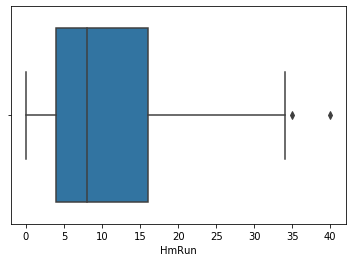

In [28]:
sns.boxplot(x = df["HmRun"]); 

In [29]:
Q1 = df_HmRun.quantile(0.25)
Q3 = df_HmRun.quantile(0.75)
IQR = Q3-Q1
print("Q1: " + str(Q1))
print("Q3: " + str(Q3))

Q1: 4.0
Q3: 16.0


In [30]:
alt_sinir = Q1 - 1.5*IQR # eksi olduğundan 0 alınabilir.zaten alt sinirdan düşük aykırı değer yoktur.
ust_sinir = Q3 + 1.5*IQR
print("Alt Sınır: " + str(alt_sinir))
print("Ust Sınır: " + str(ust_sinir))

Alt Sınır: -14.0
Ust Sınır: 34.0


In [31]:
aykiri_tfs = (df_HmRun > ust_sinir) #Veri setinde 80 den küçük veya 96 dan büyük değerler aykırı değerdir. Bu sette aykırı değerlere rastlanmamıştır.

In [32]:
df[aykiri_tfs ==True]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,YearsGroup
80,561,118,35,70,94,33,16,6677,1575,442,...,1210,608,A,W,463,32,8,480.416667,A,4
136,589,170,40,107,108,69,6,2325,634,128,...,376,238,A,E,368,20,3,1237.500000,A,2


In [33]:
#HmRun değişkenindeki aykırı değerler üst sınırla doldurulmuştur.
df_HmRun[aykiri_tfs] = ust_sinir
df_HmRun[aykiri_tfs] 

80     34
136    34
Name: HmRun, dtype: int64


Çok fazla değişken olduğu için değişkenlerdeki aykırı değerler döngü ile bulunup baskılama yöntemi ile doldurma yapılmıştır.

In [34]:
for i in df[["HmRun","Runs","RBI" ,"Walks","Years", "CAtBat", "CHits", "CHmRun","CRuns", "CRBI", "CWalks", "PutOuts", "Assists", "Errors","Salary"]]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    ust_sinir = Q3 + 1.5*IQR #alt_sinir değerleri 0'dan başlamaktadır.
    ust_sinir = int(ust_sinir)
    aykiri_tf = (df[i] > ust_sinir)
    df_i = df[i]
    df_i[aykiri_tf] = int(ust_sinir)
    print(df_i)

0       1
1       7
2      18
3      20
4      10
       ..
317     7
318     5
319     3
320     9
321     9
Name: HmRun, Length: 322, dtype: int64
0      30
1      24
2      66
3      65
4      39
       ..
317    65
318    76
319    61
320    85
321    77
Name: Runs, Length: 322, dtype: int64
0      29
1      38
2      72
3      78
4      42
       ..
317    48
318    50
319    43
320    60
321    44
Name: RBI, Length: 322, dtype: int64
0      14
1      39
2      76
3      37
4      30
       ..
317    37
318    94
319    52
320    78
321    31
Name: Walks, Length: 322, dtype: int64
0       1
1      14
2       3
3      11
4       2
       ..
317     5
318    12
319     6
320     8
321    11
Name: Years, Length: 322, dtype: int64
0       293
1      3449
2      1624
3      5628
4       396
       ... 
317    2703
318    5511
319    1700
320    3198
321    4908
Name: CAtBat, Length: 322, dtype: int64
0        66
1       835
2       457
3      1575
4       101
       ... 
317     806
31

In [35]:
# 2.yol : LOF 
from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df[num_features])
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-1.80778465, -1.73890249, -1.40065136, -1.39751568, -1.37807647,
       -1.36956867, -1.36791024, -1.36063576, -1.36030062, -1.35770172,
       -1.35431034, -1.33675042, -1.32424304, -1.31992945, -1.30459344,
       -1.29197225, -1.2749508 , -1.26872102, -1.2582574 , -1.20836974])

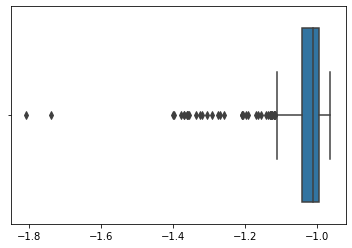

In [36]:
sns.boxplot(df_scores);

In [37]:
threshold=np.sort(df_scores)[7]
print(threshold)
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

-1.3606357606210375


In [38]:
df.shape

(314, 21)

## 2.5 Dağılım Grafikleri

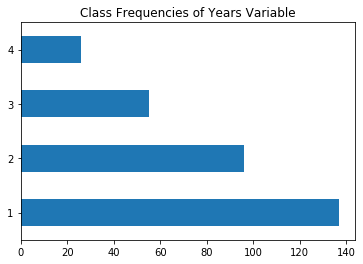

In [39]:
#YearsGrouplara göre toplam oyuncu sayıları
df["YearsGroup"].value_counts().plot.barh().set_title("Class Frequencies of Years Variable");

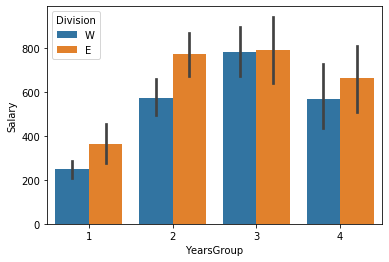

In [40]:
#Yearsgrouplar ve division a göre oyuncular sınıflandırıldığında maaş değişkeni
sns.barplot(x = "YearsGroup", y = "Salary", hue = "Division", data = df); 

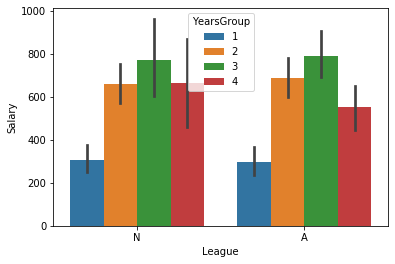

In [41]:
#Oyuncular league ve yearsgroup lar olarak sınıflandırıldığında maaş değişkeni 
sns.barplot(x = "League", y = "Salary", hue = "YearsGroup", data = df);

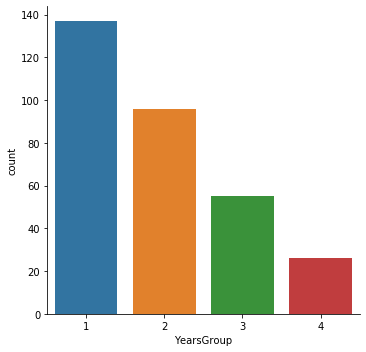

In [42]:
#Yearsgrouplara göre sınıflandırıldığında toplam oyuncu sayıları
sns.catplot('YearsGroup',data=df,kind='count')

In [43]:
df.groupby(["YearsGroup","Division"])["Salary"].count()

YearsGroup  Division
1           E           65
            W           72
2           E           50
            W           46
3           E           29
            W           26
4           E            9
            W           17
Name: Salary, dtype: int64

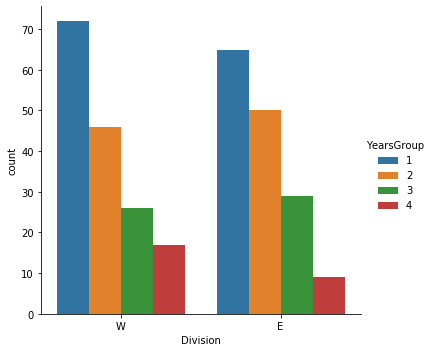

In [44]:
#YearsGrouplar ve Divison a göre sınıflandırıldığında toplam oyuncu sayıları
sns.catplot('Division',data=df,hue='YearsGroup',kind='count')

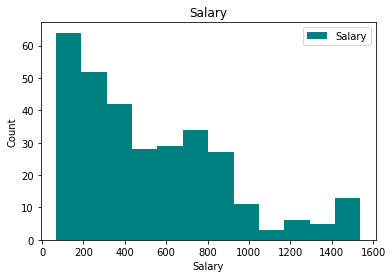

In [45]:
#Salary değişkeninin histogram grafiği 
plt.hist(df.Salary,bins=12,
         color='#008080',label="Salary") 

plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend()
plt.title("Salary")

plt.show()

# 3. Özellik Mühendisliği

## 3.1 Yeni Değişken Oluşturma

In [46]:
#değişkenler arası korelasyon incelenir.
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967451,0.594569,0.913603,0.820712,0.673102,0.041107,0.243685,0.266379,0.270372,0.281924,0.270071,0.203319,0.309403,0.346972,0.356397,0.368058
Hits,0.967451,1.000000,0.563135,0.923022,0.810727,0.642899,0.037108,0.235251,0.270121,0.246032,0.277706,0.261616,0.193270,0.291863,0.312142,0.316345,0.404541
HmRun,0.594569,0.563135,1.000000,0.650101,0.855100,0.476247,0.115920,0.234172,0.237244,0.533433,0.279355,0.369589,0.253305,0.233483,-0.101798,0.056247,0.319133
Runs,0.913603,0.923022,0.650101,1.000000,0.797807,0.733476,0.000138,0.196488,0.221571,0.260072,0.267758,0.232240,0.218338,0.261299,0.216233,0.249711,0.384308
RBI,0.820712,0.810727,0.855100,0.797807,1.000000,0.614525,0.143382,0.305312,0.323553,0.488033,0.340199,0.415296,0.283473,0.290654,0.108067,0.207877,0.412738
Walks,0.673102,0.642899,0.476247,0.733476,0.614525,1.000000,0.135815,0.287018,0.297502,0.353778,0.351425,0.333032,0.440620,0.276505,0.155161,0.148746,0.418417
Years,0.041107,0.037108,0.115920,0.000138,0.143382,0.135815,1.000000,0.921667,0.907247,0.756286,0.886752,0.877300,0.854087,-0.009396,-0.082552,-0.162280,0.448302
CAtBat,0.243685,0.235251,0.234172,0.196488,0.305312,0.287018,0.921667,1.000000,0.995364,0.838694,0.983122,0.960333,0.920940,0.052039,0.005369,-0.061900,0.550789
CHits,0.266379,0.270121,0.237244,0.221571,0.323553,0.297502,0.907247,0.995364,1.000000,0.835339,0.985010,0.959684,0.911267,0.058294,0.002565,-0.056949,0.575662
CHmRun,0.270372,0.246032,0.533433,0.260072,0.488033,0.353778,0.756286,0.838694,0.835339,1.000000,0.859444,0.939764,0.835016,0.116477,-0.151444,-0.128035,0.548654


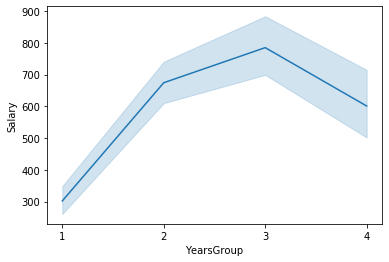

In [47]:
sns.lineplot(x='YearsGroup', y="Salary", data=df, estimator=np.mean)

In [48]:
df['New_HitRate']=df["CHits"]/df["CAtBat"]

In [49]:
df['New_AtBat']=df["CAtBat"]/df["Years"]
df['New_RBI']=df["CRBI"]/df["Years"]
df['New_Walks']=df["CWalks"]/df["Years"]
df['New_Hits']=df["CHits"]/df["Years"]
df['New_HmRun']=df["CHmRun"]/df["Years"]
df['New_Runs']=df["CRuns"]/df["Years"]


## 3.2  Kategorik Değişkenlerde Ölçeklendirme

In [50]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [51]:
lbe.fit_transform(df["League"])
df["donusum_League"] = lbe.fit_transform(df["League"])

In [52]:
lbe.fit_transform(df["NewLeague"])
df["donusum_NewLeague"] = lbe.fit_transform(df["NewLeague"])

In [53]:
lbe.fit_transform(df["Division"])
df["donusum_Division"] = lbe.fit_transform(df["Division"])

In [54]:
df = pd.concat([df, pd.get_dummies(df["YearsGroup"],prefix="yearsgroup")], axis = 1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,New_Hits,New_HmRun,New_Runs,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4
0,323,81,6,26,32,8,2,341,86,6,...,43.000000,3.000000,16.000000,1,1,1,1,0,0,0
1,401,92,17,49,66,65,13,5206,1332,204,...,102.461538,15.692308,60.307692,0,0,0,0,0,1,0
2,574,159,21,107,75,59,10,4631,1300,90,...,130.000000,9.000000,70.200000,0,0,0,0,1,0,0
3,202,53,4,31,26,27,9,1876,467,15,...,51.888889,1.666667,21.333333,1,1,1,0,1,0,0
4,418,113,13,48,61,47,4,1512,392,41,...,98.000000,10.250000,51.250000,1,1,0,1,0,0,0


In [55]:
columns = ["League","NewLeague", "Division"]
df.drop(columns ,axis = 1,inplace=True)

## 3.3 Sürekli Değişkenlerde Ölçeklendirme 

In [56]:
from sklearn import preprocessing
y = df[["Salary"]]
X = df.drop('Salary', axis=1)

In [57]:
#1.yol : Standard Scaler Yöntemi
cols = X.columns
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = cols)

In [58]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,New_Hits,New_HmRun,New_Runs,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4
0,-0.378090,-0.432294,-0.558338,-0.963314,-0.616936,-1.431686,-1.123951,-1.026420,-1.008011,-0.884410,...,-1.114304,-0.811228,-1.308615,1.093528,1.093528,0.974839,1.136649,-0.663602,-0.460820,-0.300463
1,0.129150,-0.195738,0.713759,-0.080551,0.681391,1.210541,1.137043,1.147174,0.996005,2.250812,...,0.417309,1.376122,0.806330,-0.914471,-0.914471,-1.025811,-0.879779,-0.663602,2.170044,-0.300463
2,1.254183,1.245105,1.176340,2.145546,1.025065,0.932412,0.520408,0.890274,0.944537,0.445684,...,1.126646,0.222792,1.278520,-0.914471,-0.914471,-1.025811,-0.879779,1.506928,-0.460820,-0.300463
3,-1.164963,-1.034437,-0.789628,-0.771409,-0.846053,-0.550944,0.314863,-0.340610,-0.395226,-0.741900,...,-0.885343,-1.041011,-1.054038,1.093528,1.093528,0.974839,-0.879779,1.506928,-0.460820,-0.300463
4,0.239703,0.255870,0.251178,-0.118932,0.490460,0.376153,-0.712861,-0.503239,-0.515853,-0.330204,...,0.302388,0.438213,0.373978,1.093528,1.093528,-1.025811,1.136649,-0.663602,-0.460820,-0.300463


In [59]:
columns_to_scale = ["AtBat","Hits","HmRun","Runs","RBI","Walks","Years","CAtBat","CHits","CHmRun","CRuns","CRBI","CWalks","PutOuts","Assists","Errors","YearsGroup","New_HitRate","New_AtBat","New_RBI","New_Walks","New_Hits","New_HmRun","New_Runs"] 
#kategorik olmayan değişkenleri listeledik

In [60]:
#2.yol MinMaxScaler Yöntemi
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) #

In [61]:
scaled_columns = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]),columns = columns_to_scale) #kategorik olmayan değişkenleri ölçeklendirme yaptık ve ayrı bir dataFrame oluşturduk.
scaled_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,314.0,0.544173,0.229536,0.0,0.355067,0.543219,0.740313,1.0
Hits,314.0,0.422371,0.196518,0.0,0.262658,0.400844,0.573840,1.0
HmRun,314.0,0.318471,0.254733,0.0,0.117647,0.235294,0.470588,1.0
Runs,314.0,0.402352,0.205482,0.0,0.244094,0.377953,0.549213,1.0
RBI,314.0,0.404673,0.220415,0.0,0.235294,0.369748,0.544118,1.0
Walks,314.0,0.392781,0.218254,0.0,0.222222,0.353535,0.542929,1.0
Years,314.0,0.323408,0.243644,0.0,0.150000,0.250000,0.500000,1.0
CAtBat,314.0,0.305786,0.261709,0.0,0.095435,0.223033,0.455901,1.0
CHits,314.0,0.304177,0.267272,0.0,0.088412,0.218455,0.452897,1.0
CHmRun,314.0,0.303203,0.310070,0.0,0.068627,0.186275,0.448529,1.0


In [62]:
df.drop(["AtBat","Hits","HmRun","Runs","RBI","Walks","Years","CAtBat","CHits","CHmRun","CRuns","CRBI","CWalks","PutOuts","Assists","Errors","YearsGroup","New_HitRate","New_AtBat","New_RBI","New_Walks","New_Hits","New_HmRun","New_Runs"],axis = 1, inplace = True)
df = pd.concat([df,scaled_columns], axis = 1)        
#Asıl veri setinden eski değerleri sildik sadece label encoder uyguladıklarımız kaldı. Bu sete ölçeklendirme yaptıklarımızı ekledik.

In [63]:
df

,Salary,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4,AtBat,Hits,...,Assists,Errors,YearsGroup,New_HitRate,New_AtBat,New_RBI,New_Walks,New_Hits,New_HmRun,New_Runs
0,75.000,1,1,1,1,0,0,0,0.457526,0.337553,...,0.717822,0.826087,0.000000,0.522682,0.253393,0.170000,0.045198,0.211704,0.100000,0.144522
1,1100.000,0,0,0,0,0,1,0,0.573770,0.383966,...,0.000000,0.000000,0.666667,0.540174,0.617017,0.684615,0.649283,0.518734,0.523077,0.557647
2,517.143,0,0,0,0,1,0,0,0.831595,0.666667,...,1.000000,0.956522,0.333333,0.659002,0.716063,0.504000,0.551412,0.660929,0.300000,0.649883
3,512.500,1,1,1,0,1,0,0,0.277198,0.219409,...,0.111386,0.478261,0.333333,0.507072,0.313392,0.206667,0.202134,0.257602,0.055556,0.194250
4,550.000,1,1,0,1,0,0,0,0.599106,0.472574,...,0.027228,0.304348,0.000000,0.556430,0.581500,0.510000,0.573446,0.495697,0.341667,0.473193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,700.000,1,1,0,1,0,0,0,0.716841,0.531646,...,0.022277,0.130435,0.000000,0.742514,0.838609,0.622000,0.311864,0.822031,0.213333,0.702098
310,875.000,0,0,0,0,0,1,0,0.709389,0.569620,...,0.943069,0.869565,0.666667,0.627749,0.709975,0.375833,0.703390,0.639845,0.108333,0.692308
311,385.000,0,0,1,0,1,0,0,0.684054,0.527426,...,0.279703,0.304348,0.333333,0.534663,0.431809,0.155000,0.274953,0.362306,0.038889,0.332556
312,960.000,0,0,0,0,1,0,0,0.830104,0.603376,...,0.324257,0.521739,0.333333,0.598117,0.615891,0.525000,0.468927,0.542814,0.404167,0.543124


## 3.4 Değişken Önem Düzeyleri

In [64]:
from sklearn.feature_selection import RFECV #Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
from sklearn.ensemble import RandomForestRegressor

def select_features(X,y):
    # numerik olmayan degiskenlerin silinmesi
    X = X.select_dtypes([np.number]).dropna(axis=1)
    
    clf = RandomForestRegressor(random_state=46)
    clf.fit(X, y)
    
    selector = RFECV(clf,cv=10)
    selector.fit(X, y)
    
    features = pd.DataFrame()
    features['Feature'] = X.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    features.plot(kind='bar', figsize=(12, 5))
    
    
    best_columns = list(X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

Best Columns 
------------
['AtBat', 'Hits', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'PutOuts', 'New_HitRate', 'New_AtBat', 'New_RBI', 'New_Hits', 'New_HmRun', 'New_Runs']



['AtBat',
 'Hits',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CRuns',
 'CRBI',
 'PutOuts',
 'New_HitRate',
 'New_AtBat',
 'New_RBI',
 'New_Hits',
 'New_HmRun',
 'New_Runs']

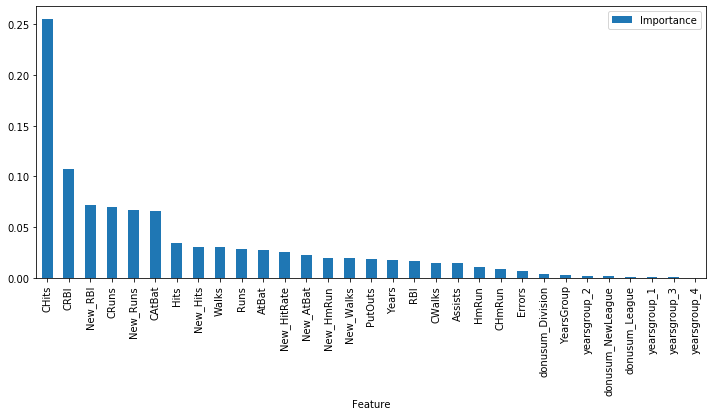

In [65]:
best_features = select_features(X,y)
best_features

# 4. Doğrusal Modeller

## 4.1. Lineer Regresyon


### Veri Setini Ayırmadan

In [66]:
y = df["Salary"]
X = df.drop('Salary', axis=1)

In [67]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

In [68]:
X.head()

,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4,AtBat,Hits,HmRun,...,Assists,Errors,YearsGroup,New_HitRate,New_AtBat,New_RBI,New_Walks,New_Hits,New_HmRun,New_Runs
0,1,1,1,1,0,0,0,0.457526,0.337553,0.176471,...,0.717822,0.826087,0.000000,0.522682,0.253393,0.170000,0.045198,0.211704,0.100000,0.144522
1,0,0,0,0,0,1,0,0.573770,0.383966,0.500000,...,0.000000,0.000000,0.666667,0.540174,0.617017,0.684615,0.649283,0.518734,0.523077,0.557647
2,0,0,0,0,1,0,0,0.831595,0.666667,0.617647,...,1.000000,0.956522,0.333333,0.659002,0.716063,0.504000,0.551412,0.660929,0.300000,0.649883
3,1,1,1,0,1,0,0,0.277198,0.219409,0.117647,...,0.111386,0.478261,0.333333,0.507072,0.313392,0.206667,0.202134,0.257602,0.055556,0.194250
4,1,1,0,1,0,0,0,0.599106,0.472574,0.382353,...,0.027228,0.304348,0.000000,0.556430,0.581500,0.510000,0.573446,0.495697,0.341667,0.473193


In [69]:
y.head()

0      75.000
1    1100.000
2     517.143
3     512.500
4     550.000
Name: Salary, dtype: float64

In [70]:
reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
reg_model.intercept_

-4464951076460284.0

In [72]:
reg_model.coef_

array([ 6.20918962e+01, -4.04500940e+01, -8.61869778e+01,  4.46495108e+15,
        3.60244977e+15,  2.73994846e+15,  1.87744715e+15,  2.95441523e+02,
       -4.59659948e+02, -1.22388998e+01,  2.05698030e+02, -7.76439101e+01,
       -2.12772738e+01, -2.89611423e+02,  6.55288692e+02, -4.84979047e+02,
       -9.16524807e+01,  2.23054841e+02,  6.74380187e+02, -6.18837736e+01,
        1.72631597e+02,  7.95087109e+01, -6.93140057e+01,  2.58750392e+15,
       -4.44031994e+02, -3.58638608e+03,  9.81923447e+01,  2.28968334e+02,
        3.70751384e+03,  9.92497491e+01,  1.23879885e+02])

In [73]:
y_pred = reg_model.predict(X)

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
mean_squared_error(y, y_pred , squared = False)  #rmse bulundu.

225.6918170353857

### Veri seti Train ve Test olarak ayrılırsa :

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 46 )

In [77]:
X_train.head()

,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4,AtBat,Hits,HmRun,...,Assists,Errors,YearsGroup,New_HitRate,New_AtBat,New_RBI,New_Walks,New_Hits,New_HmRun,New_Runs
115,1,0,0,1,0,0,0,0.482861,0.350211,0.323529,...,0.019802,0.173913,0.000000,0.502709,0.463223,0.282000,0.494915,0.377969,0.280000,0.524942
122,1,1,0,0,1,0,0,0.432191,0.434599,0.411765,...,0.549505,0.652174,0.333333,0.647290,0.651074,0.538571,0.301856,0.596017,0.261905,0.412254
184,0,0,0,0,0,1,0,0.707899,0.590717,0.323529,...,0.019802,0.086957,0.666667,0.698487,0.436131,0.286667,0.256121,0.416523,0.186667,0.377622
206,1,1,1,0,1,0,0,0.467958,0.320675,0.558824,...,0.019802,0.260870,0.333333,0.596467,0.491896,0.480000,0.303202,0.433735,0.500000,0.379176
212,1,1,0,1,0,0,0,0.421759,0.312236,0.176471,...,0.002475,0.086957,0.000000,0.635795,0.289498,0.110000,0.165725,0.265060,0.088889,0.216006


In [78]:
y_train.head()

115    400.0
122    750.0
184    525.0
206    670.0
212    140.0
Name: Salary, dtype: float64

In [79]:
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((219, 31), (219,), (95, 31), (95,))

In [80]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
#Eğitim Hatası
rmse = mean_squared_error(y_train, reg_model.predict(X_train), squared = False)
rmse

212.39963520088799

In [82]:
y_pred = reg_model.predict(X_test)

In [83]:
#test hatasi
mean_squared_error(y_test, y_pred, squared = False)

275.03932770693706

# Model Doğrulama - K-Fold CV 

# Tüm veriyi Cross Validation hatası üzerinden gözlemledik.

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
#1.yol
-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")

array([50423.23873299, 41733.00045956, 69573.59887056, 56955.64482202,
       75107.92843603, 49108.55811419, 87464.67415119, 75743.34596931,
       85689.72741453, 54556.52935435])

In [86]:
#mse
np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")) #10 katlı hatamımızın ortalaması

64635.62463247328

In [87]:
np.std(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")) #hataların değişimi

15329.89598415839

In [88]:
#rmse
np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error"))) #10 katlı hatamımızın ortalamasının karekökü 
#veri

254.23537250444377

# Train ve test olarak ayırdık

In [89]:
#2.yol
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state = 1)

In [90]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))) #validation hatası

286.0491173264226

In [92]:
#test
y_pred = reg_model.predict(X_test)

In [93]:
#test hatasi
np.sqrt(mean_squared_error(y_test, y_pred)) #hiç görmediği verinin performansını ölçebilir, test edilebilir

227.50347421095458

# 4.2 Ridge Regresyon

### Veri setini ayırmadan

In [94]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [95]:
X = df.drop('Salary', axis=1)
y = df[["Salary"]]

In [96]:
ridge_model = Ridge().fit(X, y)

In [97]:
ridge_model.coef_

array([[  54.61740975,  -42.36142124,  -92.39577292,  -38.18991228,
         174.78530816,   87.70127385, -224.29666972, -137.23103079,
         138.18178129,  -19.32008458,   94.1325699 ,  -17.31592063,
          45.02368493, -181.17907596,    5.7783444 ,  253.71012461,
         114.9759264 ,  231.14333717,  280.41469541,   60.6596334 ,
         196.67233717,   41.83121113,  -70.02553819, -107.56738444,
         187.81413085, -293.25521495,  153.92702036,   14.51743482,
         179.7739097 ,  -41.91695843,  104.24576163]])

In [98]:
ridge_model.intercept_

array([103.23613738])

# Tahmin

In [99]:
y_pred = ridge_model.predict(X)

In [100]:
mean_squared_error(y, y_pred , squared = False)

234.24100355287035

In [101]:
ridge_model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [103]:
ridge_model = Ridge()
coefs = []

for i in alphas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X, y)
    y_pred = ridge_model.predict(X)
    print(np.sqrt(mean_squared_error(y, y_pred)))

369.98332271578806
369.98331967314505
369.98331565095026
369.98331033384585
369.98330330494736
369.9832940131583
369.9832817299619
369.9832654923025
369.98324402707823
369.9832156513251
369.9831781402674
369.9831285528878
369.98306300134476
369.9829763461578
369.9828617932668
369.98271036137714
369.9825101778389
369.98224554787004
369.9818957241762
369.9814332805511
369.98082196203086
369.98001384320156
369.9789455721329
369.97753340592647
369.97566664948044
369.97319898450706
369.9699370115172
369.96562511088587
369.95992544384995
369.95239153907426
369.9424334176884
369.9292715640616
369.9118762060779
369.88888727101926
369.858508962453
369.8183710781597
369.7653468677413
369.6953143186161
369.6028441869583
369.4807938411265
369.3197811796254
369.1075079159348
368.82789728966713
368.46000957112057
367.97670290545403
367.34302288156516
366.5143412033362
365.4343365564094
364.0330395862812
362.225373210528
359.9109292094392
356.9761256528451
353.3003101625203
348.76759552023145
343.285

In [104]:
ridge_model = Ridge()
coefs = []

for i in alphas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X, y)
    coefs.append(ridge_model.coef_)


In [105]:
ridge_model = Ridge().fit(X, y)
y_pred = ridge_model.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

234.24100355287035

# Model Tuning

In [106]:
?Ridge #solver : {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'}, 

Object `Ridge #solver : ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'), ` not found.


* ALPHAS 1

In [107]:
alphas1 = np.random.randint(0,1000,100)
ridge_cv = RidgeCV(alphas = alphas1, scoring = "neg_mean_squared_error", cv = 10, normalize = True) #hata kareler ortalaması
ridge_cv.fit(X, y)
alpha = ridge_cv.alpha_
alpha

9

* * Solver : auto

In [108]:
ridge_tuned = Ridge(alpha = alpha, normalize  = True).fit(X, y)
y_pred = ridge_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

290.8756579960996

* * Solver : sparse_cg

In [109]:
ridge_tuned = Ridge(alpha = alpha, solver = "sparse_cg").fit(X, y)
y_pred = ridge_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

243.05188236217188

* ALPHAS 2

In [110]:
alphas2 = np.linspace(0,1,100)
ridge_cv = RidgeCV(alphas = alphas2, scoring = "neg_mean_squared_error", cv = 10, normalize = True) #hata kareler ortalaması
ridge_cv.fit(X, y)
alpha = ridge_cv.alpha_
alpha

0.010101010101010102

* * Solver : auto

In [111]:
ridge_tuned = Ridge(alpha = alpha).fit(X, y)
y_pred = ridge_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

225.9888809887253

* * Solver : sag

In [112]:
ridge_tuned = Ridge(alpha = alpha, solver = "sag").fit(X, y)
y_pred = ridge_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

226.38495767967822

* ALPHAS 3

In [113]:
alphas3 =  np.linspace(0,20,100)
ridge_cv = RidgeCV(alphas = alphas3, scoring = "neg_mean_squared_error", cv = 10, normalize = True) #hata kareler ortalaması
ridge_cv.fit(X, y)
alpha = ridge_cv.alpha_
alpha

0.20202020202020202

* * Solver : auto

In [114]:
ridge_tuned = Ridge(alpha = alpha).fit(X, y)
y_pred = ridge_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

230.19730847405327

* * Solver : sag

In [115]:
ridge_tuned = Ridge(alpha = alpha, solver = "sag").fit(X, y)
y_pred = ridge_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

230.25966585481822

### Veri seti Train ve Test olarak ayrılırsa

In [116]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=46)

In [118]:
ridge_model = Ridge().fit(X_train, y_train)

In [119]:
ridge_model.coef_  #alpha = 1

array([[  79.81860626,  -53.01014645,  -90.29161571,  -18.32713326,
         204.04244267,   57.64828359, -243.363593  , -131.33963547,
         204.03894915,   -1.38201454,  144.66317907,  -74.04939026,
          -1.59521414, -224.80265346,   44.54498933,  204.03123453,
         125.10614476,  185.20672228,  336.02117263,  156.22800448,
         211.85220118,   36.17985046,  -60.70428723, -136.91725638,
         201.82842342, -230.32659962,  162.28838773,   29.42051009,
         114.75111331,   16.96529977,   57.05492959]])

In [120]:
ridge_model.intercept_

array([36.93701516])

# Tahmin

In [121]:
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

262.88303594542487

In [122]:
ridge_model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [123]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [124]:
ridge_model = Ridge() #katsayıları göstermek istersek
coefs = []

for i in alphas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)
coefs

#her bir alfaya karşılık beta katsayıları

[array([[-4.16284078e-07, -3.69192441e-07, -1.62387483e-06,
         -4.24340223e-06,  2.14866446e-06,  1.85317016e-06,
          2.41567606e-07,  1.42797646e-06,  1.37116277e-06,
          1.45689455e-06,  1.34577992e-06,  1.53378286e-06,
          1.51875556e-06,  1.73666231e-06,  2.28777709e-06,
          2.43052327e-06,  2.82505012e-06,  2.54919102e-06,
          2.89677350e-06,  2.73785952e-06,  1.21581279e-06,
         -7.14118302e-08, -1.13224670e-08,  2.19323587e-06,
          8.39223325e-07,  1.66479810e-06,  1.76835927e-06,
          1.44873816e-06,  1.76771927e-06,  1.29589942e-06,
          1.70104325e-06]]),
 array([[-5.50303036e-07, -4.88050665e-07, -2.14666695e-06,
         -5.60952794e-06,  2.84040794e-06,  2.44978186e-06,
          3.19338139e-07,  1.88770082e-06,  1.81259647e-06,
          1.92592883e-06,  1.77904184e-06,  2.02757065e-06,
          2.00770545e-06,  2.29576533e-06,  3.02430663e-06,
          3.21300869e-06,  3.73454995e-06,  3.36988046e-06,
          3

In [125]:
ridge_model = Ridge() #hataların değişimi
coefs = []

for i in alphas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    print(np.sqrt(mean_squared_error(y_test, y_pred)))

366.8477099427412
366.84770783603136
366.847705051085
366.84770136954984
366.84769650277747
366.8476900691913
366.84768156437
366.84767032149836
366.8476554590866
366.8476358118579
366.8476098393865
366.8475755053232
366.8475301177386
366.84747011806957
366.84739080211955
366.8472859512436
366.8471473448047
366.8469641156839
366.8467218983281
366.8464017025647
366.84597842492656
366.8454188808484
366.84467920358315
366.8437014061345
366.84240883706013
366.8407001745727
366.83844148930444
366.83545575560834
366.83150899285687
366.8262919568347
366.8193959574151
366.81028092689473
366.79823327098825
366.78231025994006
366.7612667082046
366.7334583832444
366.6967149001625
366.64817271140714
366.5840560980015
366.49939073125375
366.38763036794137
366.24017264351147
366.04573503916345
365.78955765203614
365.45239689754976
365.0092765457273
364.42797452107675
363.6672539718574
362.6749082041645
361.3857998314122
359.72025841335244
357.5834803062249
354.8669535007452
351.45335834882405
347.22

In [126]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

262.88303594542487

# Model Tuning

In [127]:
?Ridge #solver : {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'}, 

Object `Ridge #solver : ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'), ` not found.


* ALPHAS 1

In [128]:
alphas1 = np.random.randint(0,1000,100)
ridge_cv = RidgeCV(alphas = alphas1, scoring = "neg_mean_squared_error", cv = 10, normalize = True) #hata kareler ortalaması
ridge_cv.fit(X_train, y_train)
alpha = ridge_cv.alpha_
alpha

8

* * Solver : auto

In [129]:
ridge_tuned = Ridge(alpha = alpha).fit(X_train, y_train)
ridge_tuned = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, ridge_tuned))

258.9097884370759

* * Solver : sparse_cg

In [130]:
ridge_tuned = Ridge(alpha = alpha, solver = "sparse_cg").fit(X_train, y_train)
ridge_tuned = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, ridge_tuned))

258.88940958399974

* ALPHAS 2

In [131]:
alphas2 = np.linspace(0,1,100)
ridge_cv = RidgeCV(alphas = alphas2, scoring = "neg_mean_squared_error", cv = 10, normalize = True) #hata kareler ortalaması
ridge_cv.fit(X_train, y_train)
alpha = ridge_cv.alpha_
alpha

0.020202020202020204

* * Solver : auto

In [132]:
ridge_tuned = Ridge(alpha = alpha).fit(X_train, y_train)
ridge_tuned = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, ridge_tuned))

273.3513098167708

* * Solver : sag

In [133]:
ridge_tuned = Ridge(alpha = alpha, solver = "sag").fit(X_train, y_train)
ridge_tuned = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, ridge_tuned))

273.60342354460545

* ALPHAS 3

In [134]:
alphas3 =  np.linspace(0,20,100)
ridge_cv = RidgeCV(alphas = alphas3, scoring = "neg_mean_squared_error", cv = 10, normalize = True) #hata kareler ortalaması
ridge_cv.fit(X_train, y_train)
alpha = ridge_cv.alpha_
alpha

0.20202020202020202

* * Solver : auto

In [135]:
ridge_tuned = Ridge(alpha = alpha).fit(X_train, y_train)
ridge_tuned = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, ridge_tuned))

268.76779163897976

* * Solver : sag

In [136]:
ridge_tuned = Ridge(alpha = 0.5, solver = "sag").fit(X_train, y_train)
ridge_tuned = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, ridge_tuned))

265.38055707643923

## 4.3  LASSO REGRESSION
### Tum veri seti üzerinden model kurduk.

In [137]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

## Model

In [138]:
lasso_model = Lasso().fit(X, y)

In [139]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
lasso_model.intercept_

array([7.3317625])

In [141]:
lasso_model.coef_

array([  22.77675755,  -15.06649348,  -92.0850102 ,   -0.        ,
        154.82050609,    0.        , -371.45069522,   -0.        ,
          0.        ,    0.        ,   31.13720086,    0.        ,
         59.11352691,  -46.66180817,   -0.        ,    0.        ,
          0.        ,  361.72528705,  524.19719021,    0.        ,
        189.91471493,    0.        ,  -34.45167964,   -0.        ,
        252.76192575,   -0.        ,    0.        ,    6.89812216,
         65.88617749,    0.        ,    4.55675318])

## Tahmin

In [142]:
y_pred = lasso_model.predict(X)

In [143]:
np.sqrt(mean_squared_error(y, y_pred))

237.51476520251433

# Model Tuning

In [144]:
?lasso_model #buyuk olan lambda 

Object `lasso_model #buyuk olan lambda ` not found.


* ALPHAS 1

In [145]:
alphas1 = np.random.randint(0,1000,100)
lasso_cv_model = LassoCV(alphas = alphas1, cv = 10).fit(X, y)
alpha = lasso_cv_model.alpha_
alpha

8

In [146]:
lasso_tuned = Lasso(alpha = alpha, normalize  = True ).fit(X, y)
y_pred = lasso_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred)) #tuned edilmemiş modelden daha kötü çıktı. Çünkü alpha değeri eski alfadan daha farklı. hiperparametreler bozuk olduğunu gösterir.

324.79971861722794

* ALPHAS 2

In [147]:
alphas2 = np.random.randint(0,100,50)
lasso_cv_model = LassoCV(alphas = alphas2, cv = 10).fit(X, y)
alpha = lasso_cv_model.alpha_
alpha

2

In [148]:
lasso_tuned = Ridge(alpha = alpha, normalize  = True ).fit(X, y)
y_pred = lasso_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

260.6047918649282

* ALPHAS 3

In [149]:
lasso_tuned = Lasso(alpha = 10).fit(X, y)

In [150]:
y_pred = lasso_tuned.predict(X)

In [151]:
np.sqrt(mean_squared_error(y, y_pred))

256.8964958042885

In [152]:
pd.Series(lasso_tuned.coef_, index = X.columns) #CRBI, HITS 

donusum_League         0.000000
donusum_NewLeague      0.000000
donusum_Division     -76.466728
yearsgroup_1        -127.291402
yearsgroup_2          72.994586
yearsgroup_3          20.647656
yearsgroup_4         -82.615174
AtBat                  0.000000
Hits                   0.000000
HmRun                  0.000000
Runs                  31.876753
RBI                    0.000000
Walks                 72.203959
Years                  0.000000
CAtBat                 0.000000
CHits                  0.000000
CHmRun                 6.157294
CRuns                  0.000000
CRBI                 391.598122
CWalks                 0.000000
PutOuts               97.176669
Assists               -0.000000
Errors                -0.000000
YearsGroup            -0.000000
New_HitRate            0.000000
New_AtBat              0.000000
New_RBI                0.000000
New_Walks              0.000000
New_Hits             181.664156
New_HmRun              0.000000
New_Runs              19.794416
dtype: f

### Veri seti train ve test olarak ikiye ayrılmıştır.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=46)

In [154]:
X_train.head()

,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4,AtBat,Hits,HmRun,...,Assists,Errors,YearsGroup,New_HitRate,New_AtBat,New_RBI,New_Walks,New_Hits,New_HmRun,New_Runs
115,1,0,0,1,0,0,0,0.482861,0.350211,0.323529,...,0.019802,0.173913,0.000000,0.502709,0.463223,0.282000,0.494915,0.377969,0.280000,0.524942
122,1,1,0,0,1,0,0,0.432191,0.434599,0.411765,...,0.549505,0.652174,0.333333,0.647290,0.651074,0.538571,0.301856,0.596017,0.261905,0.412254
184,0,0,0,0,0,1,0,0.707899,0.590717,0.323529,...,0.019802,0.086957,0.666667,0.698487,0.436131,0.286667,0.256121,0.416523,0.186667,0.377622
206,1,1,1,0,1,0,0,0.467958,0.320675,0.558824,...,0.019802,0.260870,0.333333,0.596467,0.491896,0.480000,0.303202,0.433735,0.500000,0.379176
212,1,1,0,1,0,0,0,0.421759,0.312236,0.176471,...,0.002475,0.086957,0.000000,0.635795,0.289498,0.110000,0.165725,0.265060,0.088889,0.216006


In [155]:
lasso_model = Lasso().fit(X_train, y_train)

In [156]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [157]:
lasso_model.intercept_

array([-35.40650817])

In [158]:
lasso_model.coef_

array([  59.13526934,  -33.19516486,  -88.36758082,    0.        ,
        187.35344192,   -0.        , -355.41728847,   -0.        ,
          0.        ,   -0.        ,  135.84681705,   -0.        ,
          0.        , -327.81089452,    0.        ,    0.        ,
          0.        ,  204.57920448,  736.66208001,  156.70089877,
        208.34243368,    0.        ,  -21.2529883 ,   -0.        ,
        326.4879071 ,   -0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ])

## Tahmin

In [159]:
lasso_model.predict(X_test)

array([ 7.09608315e+02,  3.78951271e+02,  3.41710983e+02,  8.15312479e+02,
        3.51555444e+02,  5.92396626e+02,  4.04347278e+02,  6.26278337e+02,
        7.11215651e+01,  9.44676359e+02,  8.98018220e+02,  1.29456297e+02,
       -6.31692458e+01,  7.41372404e+02,  6.79843640e+02,  6.61919553e+02,
        6.39010665e+02,  5.78206615e+02,  3.03919559e+02,  4.17771646e+02,
        5.01528509e+02,  4.60483522e+02,  2.84260773e+02,  1.00725229e+02,
        6.38393255e+02,  2.87718978e+02,  2.12517180e+02,  8.87801994e+02,
        1.38490102e+03,  5.60548395e+02,  1.72960995e+02,  1.83044083e+02,
        1.33769854e+00,  3.40161042e+02,  2.59392365e+02,  6.15091784e+02,
        2.94176140e+02,  8.65930455e+02,  2.08593471e+02,  4.48756682e+02,
        1.09199481e+03,  8.91609820e+02,  7.68801493e+02,  1.31018139e+03,
        4.06479977e+02,  6.63457305e+02,  2.49558517e+02,  2.07596299e+02,
        2.33491681e+02,  2.43498450e+02,  1.96662180e+02,  8.86981040e+02,
        1.18827304e+03,  

In [160]:
y_pred = lasso_model.predict(X_test)

In [161]:
np.sqrt(mean_squared_error(y_test, y_pred))

264.5467017272071

In [162]:
df.describe()

,Salary,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4,AtBat,Hits,...,Assists,Errors,YearsGroup,New_HitRate,New_AtBat,New_RBI,New_Walks,New_Hits,New_HmRun,New_Runs
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,...,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,525.180416,0.455414,0.455414,0.512739,0.436306,0.305732,0.175159,0.082803,0.544173,0.422371,...,0.255660,0.341872,0.301486,0.567973,0.494613,0.377850,0.340379,0.435080,0.256908,0.400142
std,370.573889,0.498803,0.498803,0.500636,0.496718,0.461452,0.380710,0.276023,0.229536,0.196518,...,0.320029,0.263646,0.322582,0.120519,0.208746,0.193861,0.176322,0.200782,0.193729,0.195648
min,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.935897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355067,0.262658,...,0.017327,0.130435,0.000000,0.501629,0.330237,0.222912,0.213983,0.277216,0.100000,0.243512
50%,430.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.543219,0.400844,...,0.095297,0.260870,0.333333,0.572812,0.511332,0.363167,0.312070,0.435886,0.203519,0.400117
75%,750.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.740313,0.573840,...,0.410891,0.478261,0.666667,0.644642,0.662538,0.523313,0.454802,0.586247,0.385833,0.540793
max,1539.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Tuning

In [163]:
?lasso_model

Type:        Lasso
String form:
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
File:        d:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py
Docstring:  
Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, optional
    Constant that multiplies the L1 term. Defaults to 1.0.
    ``alpha = 0`` is equivalent to an ordinary least square, solved
    by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, yo

In [164]:
alphas1 = np.random.randint(0,1000,100)
lasso_cv_model = LassoCV(alphas = alphas1, cv = 10).fit(X_train, y_train)
alpha = lasso_cv_model.alpha_
alpha

75

In [165]:
lasso_tuned = Lasso(alpha = alpha).fit(X_train, y_train)

In [166]:
y_pred = lasso_tuned.predict(X_test)

In [167]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.98791989147884

In [168]:
alphas3 = np.random.randint(0,1,100)
lasso_cv_model = LassoCV(alphas = alphas3, cv = 10).fit(X_train, y_train)
alpha = lasso_cv_model.alpha_
alpha

0

In [169]:
lasso_tuned = Lasso(alpha = alpha).fit(X_train, y_train)

In [170]:
y_pred = lasso_tuned.predict(X_test)

In [171]:
np.sqrt(mean_squared_error(y_test, y_pred))

274.3836633427423

In [172]:
pd.Series(lasso_tuned.coef_, index = X_train.columns)

donusum_League         73.182690
donusum_NewLeague     -35.281604
donusum_Division      -79.984802
yearsgroup_1         -411.772717
yearsgroup_2           22.458544
yearsgroup_3           39.065532
yearsgroup_4         -106.934764
AtBat                -107.289799
Hits                  100.193174
HmRun                  13.012347
Runs                  445.226626
RBI                  -307.374258
Walks                -118.734772
Years                -605.922712
CAtBat                416.251840
CHits                -758.637227
CHmRun               -579.156564
CRuns                 305.659390
CRBI                 1767.834983
CWalks                128.303082
PutOuts               196.736194
Assists                68.624283
Errors                -34.189674
YearsGroup           -610.000874
New_HitRate          -478.366581
New_AtBat           -2959.316366
New_RBI              -265.927786
New_Walks             105.417666
New_Hits             3268.558054
New_HmRun             481.255518
New_Runs  

## 4.4 ElasticNet Regression

## Tüm veri seti üzerinden

In [173]:
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV
enet_model = ElasticNet().fit(X, y)
y_pred = enet_model.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

279.96678536627405

# Model Tahmin

In [174]:
enet_model = ElasticNet().fit(X, y)
y_pred = enet_model.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

279.96678536627405

# Model Tuning

In [175]:
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)

In [176]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read more i

In [177]:
enet_cv_model = ElasticNetCV(alphas = alphas2, cv = 10 , normalize  = True).fit(X,y)

In [178]:
enet_cv_model.alpha_

0.005

In [179]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X, y)
y_pred = enet_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

233.58544228094783

In [180]:
#gridsearch ile model tuning

In [181]:
enet_params = {"l1_ratio": [0.1,0.4,0.5,0.6,0.8,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}

In [182]:
enet_model = ElasticNet().fit(X, y)

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
gs_cv_enet = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)

In [185]:
gs_cv_enet.best_params_

{'alpha': 0.3, 'l1_ratio': 1}

In [186]:
enet_tuned = ElasticNet(**gs_cv_enet.best_params_).fit(X, y)

In [187]:
y_pred = enet_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

228.45859024402964

# Train ve Test olarak ayrılırsa

In [188]:
cols = X.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = cols)

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [190]:
X_train.head()

,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4,AtBat,Hits,HmRun,...,Assists,Errors,YearsGroup,New_HitRate,New_AtBat,New_RBI,New_Walks,New_Hits,New_HmRun,New_Runs
180,1.093528,1.093528,0.974839,1.136649,-0.663602,-0.46082,-0.300463,-0.664225,-0.797881,-1.252209,...,0.787952,1.344018,-0.936096,-1.282520,-0.334221,-0.608883,-0.007931,-0.573385,-1.328239,-0.592618
311,-0.914471,-0.914471,0.974839,-0.879779,1.506928,-0.46082,-0.300463,0.610378,0.535436,-0.905274,...,0.075248,-0.142555,0.098883,-0.276824,-0.301344,-1.151373,-0.371654,-0.363028,-1.127179,-0.345997
2,-0.914471,-0.914471,-1.025811,-0.879779,1.506928,-0.46082,-0.300463,1.254183,1.245105,1.176340,...,2.329564,2.335067,0.098883,0.756515,1.062546,0.651762,1.198775,1.126646,0.222792,1.278520
106,1.093528,1.093528,-1.025811,-0.879779,-0.663602,-0.46082,3.328201,-0.631710,-0.797881,0.366824,...,-0.769153,-0.638080,2.168843,0.493621,0.509201,0.722945,0.441375,0.532780,0.624911,0.542369
179,-0.914471,-0.914471,0.974839,1.136649,-0.663602,-0.46082,-0.300463,1.943510,2.621433,2.332792,...,-0.738166,-0.307730,-0.936096,1.699780,2.424919,1.509413,0.013465,2.818090,0.682356,2.096348


In [191]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

# Model Tahmin

In [192]:
enet_model = ElasticNet().fit(X_train, y_train)
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

257.56497697512765

# Model Tuning

In [193]:
alphas2 = 10**np.linspace(10,-2,100)*0.5

In [194]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read more i

In [195]:
enet_cv_model = ElasticNetCV(alphas = alphas2, cv = 10).fit(X_train,y_train)

In [196]:
enet_cv_model.alpha_

0.3289666123287841

In [197]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

252.61123846843586

In [198]:
#gridsearch ile model tuning

In [199]:
enet_params = {"l1_ratio": [0.1,0.4,0.5,0.6,0.8,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}

In [200]:
enet_model = ElasticNet().fit(X_train, y_train)

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
gs_cv_enet = GridSearchCV(enet_model, enet_params, cv = 10).fit(X_train, y_train)

In [203]:
gs_cv_enet.best_params_

{'alpha': 0.8, 'l1_ratio': 0.6}

In [204]:
enet_tuned = ElasticNet(**gs_cv_enet.best_params_).fit(X_train, y_train)

In [205]:
y_pred = enet_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

243.0346490968879

In [206]:
y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

255.4539460691082

# 5. Model Selecting

In [209]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

def select_model(X,y):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=46)
    
    models = [ 
 
        {
            "name": "RidgeRegression",
            "estimator": Ridge(),
            "hyperparameters":
                {
                 'alpha' :np.linspace(0,1,100) ,
                 'solver' : ['auto', 'svd', 'cholesky', 'lsqr']
                }
        },
        {
            "name": "LassoRegression",
            "estimator": Lasso(),
            "hyperparameters":
                {
                 'alpha' :np.linspace(0,1,100) ,
                }
        },
        {
            "name": "ElasticNetRegression",
            "estimator": ElasticNet(),
            "hyperparameters":
                {
                 "l1_ratio": np.linspace(0,1,30), # [0.1,0.4,0.5,0.6,0.8,1],
                 "alpha":np.linspace(0,1,100), # [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
                }
        },
       
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10,scoring="neg_mean_squared_error")
        grid.fit(X_train, y_train)
        
        model["best_params"] = grid.best_params_
        #model["best_score"] = grid.best_score_
        model["tuned_model"] = grid.best_estimator_
        
        model["train_rmse_score"] = np.sqrt(mean_squared_error(y_train, model["tuned_model"].fit(X_train,y_train).predict(X_train)))
        model["validation_rmse_score"] = np.sqrt(np.mean(-cross_val_score(model["tuned_model"], X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
        model["test_rmse_score"] = np.sqrt(mean_squared_error(y_test, model["tuned_model"].fit(X_train,y_train).predict(X_test)))
      
        #print("Best ......... Score: {}".format(model["best_score"]))
        print("Best TRAIN RMSE Score: {}".format(model["train_rmse_score"]))
        print("Best VALIDATION RMSE Score: {}".format(model["validation_rmse_score"]))
        print("Best TEST RMSE Score: {}".format(model["test_rmse_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))


In [210]:
select_model(X,y)

RidgeRegression
---------------
Best TRAIN RMSE Score: 224.9066739717246
Best VALIDATION RMSE Score: 259.6451087228662
Best TEST RMSE Score: 247.86562304068835
Best Parameters: {'alpha': 1.0, 'solver': 'lsqr'}

LassoRegression
---------------
Best TRAIN RMSE Score: 224.44416135572672
Best VALIDATION RMSE Score: 258.6406143927232
Best TEST RMSE Score: 242.13018347907794
Best Parameters: {'alpha': 1.0}

ElasticNetRegression
--------------------
Best TRAIN RMSE Score: 236.24550722991677
Best VALIDATION RMSE Score: 255.38838494581915
Best TEST RMSE Score: 252.80623009261512
Best Parameters: {'alpha': 0.18181818181818182, 'l1_ratio': 0.0}

